In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
tickers = ['AMGN', 'LNG', 'FANG', 'TSM', 'DBA', 'RTX', 'AAPL', 'PFE', 'XLF', 'XLV', 'AZN', 'XOM',
           'TRMD','MRK','WFC','MSFT','JPM']

In [3]:
ohlc = yf.download(tickers, start = '2015-01-01', end = '2023-07-5')

[*********************100%***********************]  17 of 17 completed


In [4]:
prices = ohlc["Adj Close"].dropna(how="all")
prices.tail()

,AAPL,AMGN,AZN,DBA,FANG,JPM,LNG,MRK,MSFT,PFE,RTX,TRMD,TSM,WFC,XLF,XLV,XOM
Date,,,,,,,,,,,,,,,,,
2023-06-27,188.059998,222.610001,71.669998,21.290001,127.320000,138.250549,149.410004,113.320000,334.570007,36.419998,96.529999,22.480000,102.080002,40.910000,32.930000,130.949997,104.550003
2023-06-28,189.250000,221.309998,70.959999,21.049999,128.610001,137.644699,150.000000,112.440002,335.850006,36.290001,95.870003,22.830000,100.919998,40.619999,32.849998,130.529999,105.400002
2023-06-29,189.589996,221.160004,70.849998,20.930000,130.009995,142.451691,151.210007,113.540001,335.049988,36.119999,97.800003,23.360001,100.639999,42.450001,33.419998,131.380005,106.699997
2023-06-30,193.970001,222.020004,71.570000,21.070000,131.360001,144.447983,152.360001,115.389999,340.540009,36.680000,97.959999,24.160000,100.919998,42.680000,33.709999,132.729996,107.250000
2023-07-03,192.460007,225.009995,65.250000,21.309999,131.949997,145.610001,153.720001,114.330002,337.989990,36.650002,98.389999,24.750000,103.150002,43.400002,33.900002,131.639999,107.459999


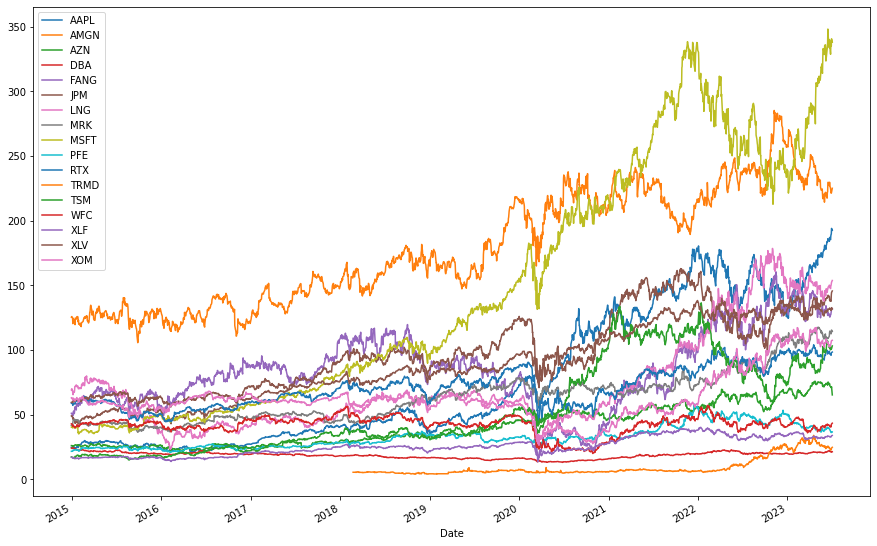

In [5]:
prices[prices.index >= "2008-01-01"].plot(figsize=(15,10));

# Calculating Covariance Matrix

In [6]:
import pypfopt
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(prices, frequency=252)

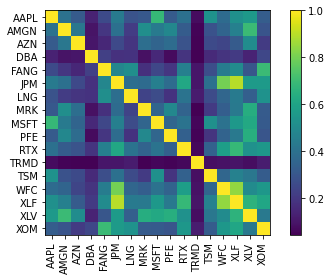

In [8]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

# Return Estimation

In [9]:
prices_2 = ohlc["Close"].dropna(how="all")
prices_2

,AAPL,AMGN,AZN,DBA,FANG,JPM,LNG,MRK,MSFT,PFE,RTX,TRMD,TSM,WFC,XLF,XLV,XOM
Date,,,,,,,,,,,,,,,,,
2014-12-31,27.594999,159.289993,35.189999,24.889999,59.779999,62.580002,70.400002,54.188931,46.450001,29.554079,72.372559,NaN,22.379999,54.820000,20.089357,68.379997,92.449997
2015-01-02,27.332500,159.889999,35.200001,24.639999,59.930000,62.490002,71.320000,54.570610,46.759998,29.724857,72.397736,NaN,22.280001,54.700001,20.089357,68.629997,92.830002
2015-01-05,26.562500,157.990005,34.930000,24.940001,57.279999,60.549999,69.190002,55.381680,46.330002,29.563566,71.189430,NaN,21.740000,53.200001,19.666937,68.279999,90.290001
2015-01-06,26.565001,152.899994,34.080002,25.110001,57.369999,58.980000,67.320000,57.557251,45.650002,29.810247,70.182503,NaN,21.360001,52.090000,19.366369,68.050003,89.809998
2015-01-07,26.937500,158.240005,34.044998,24.990000,58.250000,59.070000,66.610001,58.788170,46.230000,30.218216,70.943993,NaN,21.670000,52.400002,19.569456,69.650002,90.720001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-27,188.059998,222.610001,71.669998,21.290001,127.320000,139.199997,149.410004,113.320000,334.570007,36.419998,96.529999,22.480000,102.080002,40.910000,32.930000,130.949997,104.550003
2023-06-28,189.250000,221.309998,70.959999,21.049999,128.610001,138.589996,150.000000,112.440002,335.850006,36.290001,95.870003,22.830000,100.919998,40.619999,32.849998,130.529999,105.400002
2023-06-29,189.589996,221.160004,70.849998,20.930000,130.009995,143.429993,151.210007,113.540001,335.049988,36.119999,97.800003,23.360001,100.639999,42.450001,33.419998,131.380005,106.699997


In [30]:
prices_2.iloc[-1,0]

AAPL    192.460007
AMGN    225.009995
AZN      65.250000
DBA      21.309999
FANG    131.949997
JPM     146.610001
LNG     153.720001
MRK     114.330002
MSFT    337.989990
PFE      36.650002
RTX      98.389999
TRMD     24.750000
TSM     103.150002
WFC      43.400002
XLF      33.900002
XLV     131.639999
XOM     107.459999
Name: 2023-07-03 00:00:00, dtype: float64

In [10]:
aapl = (170.43 - prices_2.iloc[-1,0])/170.43
amgn = (287 - prices_2.iloc[-1,1])/287
azn = (79.91 - prices_2.iloc[-1,2])/79.91
dba = (25.51 - prices_2.iloc[-1,3])/25.51
fang = (174.1 - prices_2.iloc[-1,4])/174.1
jpm = (157.22 - prices_2.iloc[-1,5])/157.22
lng = (189 - prices_2.iloc[-1,6])/189
mrk = (121.39 - prices_2.iloc[-1,7])/121.39
msft = (307 - prices_2.iloc[-1,8])/307
pfe = (49.47 - prices_2.iloc[-1,9])/49.47
rtx = (115 - prices_2.iloc[-1,10])/115
trmd = (39.8 - prices_2.iloc[-1,11])/39.8
tsm = (99.67 - prices_2.iloc[-1,12])/99.67
wfc = (50 - prices_2.iloc[-1,13])/50
xlf = (37.4 - prices_2.iloc[-1,14])/37.4
xlv = (137.5 - prices_2.iloc[-1,15])/137.5
xom = (128.7 - prices_2.iloc[-1,16])/128.7

# Long/Short min variance

In [11]:
from pypfopt import EfficientFrontier

In [12]:
#help(EfficientFrontier)

In [13]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(0, 0.4))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.0),
             ('AMGN', 0.0),
             ('AZN', 0.07673),
             ('DBA', 0.4),
             ('FANG', 0.0),
             ('JPM', 0.0),
             ('LNG', 0.01117),
             ('MRK', 0.1151),
             ('MSFT', 0.0),
             ('PFE', 0.08383),
             ('RTX', 0.00999),
             ('TRMD', 0.03941),
             ('TSM', 0.04083),
             ('WFC', 0.0),
             ('XLF', 0.0),
             ('XLV', 0.21756),
             ('XOM', 0.00537)])

In [14]:
ef.portfolio_performance(verbose=True);

Annual volatility: 11.8%


# Dictionary with Expected Returns

In [15]:
exp_ret = {
    'AAPL': aapl,
    'AMGN': amgn,
    'AZN': azn,
    'DBA': dba,
    'FANG': fang,
    'JPM': jpm,
    'LNG': lng,
    'MRK': mrk,
    'MSFT': msft,
    'PFE': pfe,
    'RTX': rtx,
    'TRMD': trmd,
    'TSM': tsm,
    'WFC': wfc,
    'XLF': xlf,
    'XLV': xlv,
    'XOM': xom
}

In [16]:
exp_ret

{'AAPL': -0.12926131968472204,
 'AMGN': 0.2159930504988295,
 'AZN': 0.18345638843699158,
 'DBA': 0.16464133806576317,
 'FANG': 0.24210225762066517,
 'JPM': 0.06748504891011599,
 'LNG': 0.18666666020791997,
 'MRK': 0.058159635628513985,
 'MSFT': -0.1009445935973127,
 'PFE': 0.25914692690764285,
 'RTX': 0.14443478791610054,
 'TRMD': 0.3781407035175879,
 'TSM': -0.034915235536058034,
 'WFC': 0.13199996948242188,
 'XLF': 0.09358284690163349,
 'XLV': 0.04261818625710227,
 'XOM': 0.16503497214861954}

# Max sharpe ratio with sector constraints

In [17]:
sector_mapper = {
    'AMGN': 'Healthcare',
    'LNG': 'EMU',
    'FANG': 'EMU',
    'TSM': 'Tech',
    'DBA': 'ETF',
    'RTX': 'Industrials',
    'AAPL': 'Tech',
    'PFE': 'Healthcare',
    'XLF': 'Financials',
    'XLV': 'Healthcare',
    'AZN': 'Healthcare',
    'WFC': 'Financials',
    'XOM': 'EMU',
    'MRK': 'Healthcare',
    'TRMD': 'EMU',
    'JPM': 'Financials',
    'MSFT': 'Tech'
}

sector_lower = {
    'ETF':0.10,
    'Healthcare':0.18,
    'Tech':0.16,
    'EMU':0.16,
    'Industrials':0.05,
    'Financials':.16
}

sector_upper = {
    'ETF':0.4,
    'Healthcare':0.4,
    'Tech':0.4,
    'EMU':0.4,
    'Industrials':0.2,
    'Financials':.25
}

In [18]:
ers = pd.Series(exp_ret)
#type(ers)
#ers

In [19]:
S = risk_models.sample_cov(prices)

In [20]:
ef = EfficientFrontier(ers, S, weight_bounds=(0.02, 0.4))  # weight_bounds automatically set to (0, 1)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.max_sharpe()
weights = ef.clean_weights()
print(weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('AAPL', 0.02), ('AMGN', 0.02), ('AZN', 0.02), ('DBA', 0.13133), ('FANG', 0.02), ('JPM', 0.02), ('LNG', 0.02), ('MRK', 0.02), ('MSFT', 0.02), ('PFE', 0.25867), ('RTX', 0.05), ('TRMD', 0.1), ('TSM', 0.12), ('WFC', 0.12), ('XLF', 0.02), ('XLV', 0.02), ('XOM', 0.02)])
Expected annual return: 16.6%
Annual volatility: 17.4%
Sharpe Ratio: 0.84


(0.165839500550645, 0.1740174670846012, 0.8380739186356675)

In [21]:
weights

OrderedDict([('AAPL', 0.02),
             ('AMGN', 0.02),
             ('AZN', 0.02),
             ('DBA', 0.13133),
             ('FANG', 0.02),
             ('JPM', 0.02),
             ('LNG', 0.02),
             ('MRK', 0.02),
             ('MSFT', 0.02),
             ('PFE', 0.25867),
             ('RTX', 0.05),
             ('TRMD', 0.1),
             ('TSM', 0.12),
             ('WFC', 0.12),
             ('XLF', 0.02),
             ('XLV', 0.02),
             ('XOM', 0.02)])

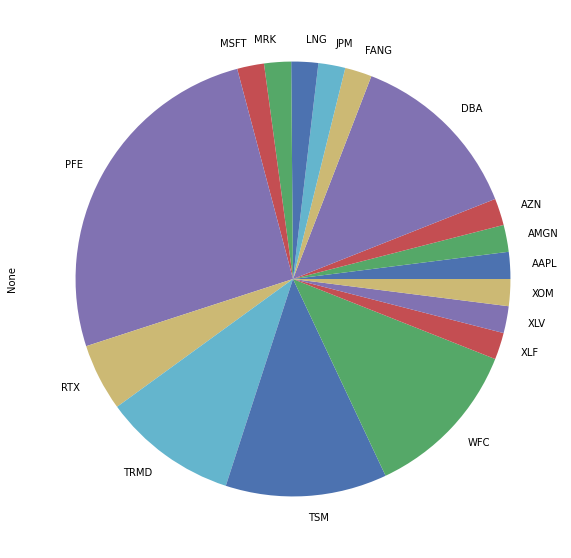

In [22]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [23]:
for sector in set(sector_mapper.values()):
    total_weight = 0
    for t,w in weights.items():
        if sector_mapper[t] == sector:
            total_weight += w
    print(f"{sector}: {total_weight:.5f}")

Tech: 0.16000
ETF: 0.13133
Healthcare: 0.33867
Industrials: 0.05000
Financials: 0.16000
EMU: 0.16000


# Maximise return for given risk

In [24]:
# ef = EfficientFrontier(ers, S, weight_bounds=(0.01, 0.4))
# ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
# ef.efficient_risk(target_volatility=0.25)
# weights = ef.clean_weights()
# weights

In [25]:
# ef.portfolio_performance(verbose=True);

In [26]:
# pd.Series(weights).plot.pie(figsize=(14,14));

# Shares

In [27]:
pv = 100000
mkt_val = []
for k,v in weights.items():
    mkt_value = pv * v
    mkt_val.append(mkt_value)

In [28]:
shares = (mkt_val/prices_2.iloc[-1:]).round()
shares

,AAPL,AMGN,AZN,DBA,FANG,JPM,LNG,MRK,MSFT,PFE,RTX,TRMD,TSM,WFC,XLF,XLV,XOM
Date,,,,,,,,,,,,,,,,,
2023-07-03,10.0,9.0,31.0,616.0,15.0,14.0,13.0,17.0,6.0,706.0,51.0,404.0,116.0,276.0,59.0,15.0,19.0
